In [309]:
import pandas as pd
import numpy as np


# df.to_pickle("df.pkl") 불러올때
# df = pd.read_pickle("df.pkl") 저장할때 list, dict 등 모든 객체를 다 저장할 수 있다

sent1= pd.read_pickle('MPB_sent.pkl') # sentence tone 측정을 위한 pkl 불러오기

## 문서 톤 측정

##문장당 톤 측정

문장당 톤(tone_s) = (문장내 매파 feature - 문장내 비둘기파 feature)/ (문장내 매파 feature + 문장내 비둘기파 feature)

##문서당 톤 측정

tone(s,i) --> i문서의 s문장들
문서당 톤 (tone_i) = (문서내 매파 tone(s,i) - 문장내 비둘기파 tone(s,i))/ (문장내 매파 tone(s,i) + 문장내 비둘기파 tone(s,i))

In [310]:
ngram_count_dff=pd.read_csv('15개이상엔그램사전-Copy1.csv')
score_pos=pd.read_csv('비둘기파-Copy1.csv')
score_neg=pd.read_csv('매파-Copy1.csv')
# score=pd.read_csv('앤그램파분리전-Copy1.csv')

In [311]:
# score_pos
words = []
for i in ngram_count_dff.index:
    words.append(i)

In [4]:
'''
for 단어사전 range(len(단어사전)):## 될수 있으면 의사록만?
    for i in  range(문서들)
        for j in range(문장들)
            if 단어사전(단어인덱스) in 문장
                
'''

'\nfor 단어사전 range(len(단어사전)):## 될수 있으면 의사록만?\n    for i in  range(문서들)\n        for j in range(문장들)\n            if 단어사전(단어인덱스) in 문장\n                \n'

In [313]:
sent1['ngram_sent'][9][0]
len(sent1['ngram_sent'][9])
# len(sent['ngram_sent'][9][0])

34

In [314]:
score_pos.columns=['pos','num']

In [315]:
score_neg.columns=['neg','num']

In [316]:
len(score_pos['pos'])

12876

In [317]:
len(score_neg)

13081

## 밑의 두칸 안보셔도 됩니다.

In [ ]:
for k in range(len(score_pos['pos'])):
    for j in range(len(sent['ngram_sent'])):
        for i in range(len(sent['ngram_sent'][j+9])):
            if score_pos['pos'][k] in sent['ngram_sent'][j+9][i]:
                print(j,i,k)#j 
                #J문서 i 문장 k-mgram(pos)
        
    #     else:
    #         print('no')

In [ ]:
df = pd.DataFrame(,colums = ['문서','문장','pos'])
for k in range(len(score_pos['pos'])):
    for j in range(len(sent['ngram_sent'])):
        for i in range(len(sent['ngram_sent'][j+9])):
            if score_pos['pos'][k] in sent['ngram_sent'][j+9][i]:
                s = [j,i,k]
                df.append(s,ignore_index = True)
                print(k)
                #print(j,i,k)#j 
                #J문서 i 문장 k-mgram(pos)
        
    #     else:
    #         print('no')

## 의사록 문서의 문장의 엔그램을 매파인지 비둘기인지 확인하여 라벨링

In [318]:

new_list= []
for i in range(len(sent1)):
    for j in range(len(sent1['ngram_sent'].iloc[i])):
        for y in sent1['ngram_sent'].iloc[i][j]:
            new_dict={}
            if y in pos:
                new_dict['문서번호'] = i
                new_dict['문장번호'] = j
                new_dict['단어'] = y
                new_dict['label'] = 1
            elif y in neg:
                new_dict['문서번호'] = i
                new_dict['문장번호'] = j
                new_dict['단어'] = y
                new_dict['label'] = -1
            if new_dict != {}:
                new_list.append(new_dict)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


## 방금 만든 의사록 ngram 데이터 프레임으로 변환

In [319]:
import pandas as pd
sent = pd.DataFrame(new_list,columns = ['문서번호','문장번호','단어','label'])
# sent= sent.columns(['단어','문서번호','문장번호','label'])

In [98]:
# sent.to_csv('의사록센티멘트.csv')

## 문장의 톤을 구하기 위해 매파와 비둘기 카운팅 하여 리스트 만들기

In [320]:
re_list = []
for i in range(147):
    for j in range(len(sent[sent['문서번호'].isin([i])]['문장번호'])):
        new_dict = {}
        new_dict['문서번호'] = i
        new_dict['문장번호'] = j
        new_dict['hawkish'] = len(sent[sent['문서번호'].isin([i])&sent['문장번호'].isin([j]) & sent['label'].isin([-1])]['label'])
        new_dict['dovish']= len(sent[sent['문서번호'].isin([i])&sent['문장번호'].isin([j]) & sent['label'].isin([1])]['label'])
        re_list.append(new_dict)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146


In [330]:
df_list = pd.DataFrame(re_list,columns = ['문서번호','문장번호','dovish','hawkish'])

In [331]:
df_list['tone_sent'] = None

In [332]:
df_list['tone_sent']= (df_list['hawkish']-df_list['dovish'])/(df_list['hawkish']+df_list['dovish'])

##  문서 극성 구하기

In [16]:
pos = []
for i in score_pos['pos']:
    pos.append(i)

In [17]:
neg = []
for i in score_neg['neg']:
    neg.append(i)

In [68]:
df_list['tone_s'] = None

In [ ]:
df1 = df_list.loc[df_list['tone_sent']>=0,:]

In [77]:
df2 = df_list.loc[df_list['tone_sent'] < 0,:]

In [83]:
df3 = df2.append(df1,ignore_index=True)

In [85]:
i_list = []
for i in range(147):
    for j in range(len(df3 [df3 ['문서번호'].isin([i])]['문장번호'])):
        new_dict = {}
        new_dict['문서번호'] = i
        new_dict['문장번호'] = j
        new_dict['hawkish_i'] = len(df3 [df3 ['문서번호'].isin([i])&df3['문장번호'].isin([j]) & df3 ['tone_s'].isin([-1])]['tone_s'])
        new_dict['dovish_i']= len(df3 [df3 ['문서번호'].isin([i])&df3['문장번호'].isin([j]) & df3 ['tone_s'].isin([1])]['tone_s'])
        i_list.append(new_dict)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146


In [102]:
df4 = pd.DataFrame(i_list)

In [104]:
df4['tone_i'] = None

In [110]:
# groups = df2.groupby(df2.key1)
df5 = df4.groupby(df4.문서번호).sum()

In [114]:
df5 = df5.drop(columns = ['문장번호'])

In [115]:
df5['tone_i'] = (df5['hawkish_i']-df5['dovish_i'])/(df5['hawkish_i']+df5['dovish_i'])

In [128]:
df5 = df5.sort_values('문서번호',ascending= False,ignore_index = True)

TypeError: sort_values() got an unexpected keyword argument 'ignore_index'

In [131]:
df5 = df5.reset_index()

## 기준금리와 상관관계를 찾고 그래프 그리기 

In [187]:
rate = pd.read_csv('기준금리2005_2017 채운것.csv',index_col=0)
rate['date'] = rate.index
rate.set_index('date')
sent1 = sent1.sort_values('data',ascending=True)

In [142]:
sent1 = sent1.sort_values('data',ascending=True)

In [145]:
sent1 = sent1.reset_index()

In [148]:
df5['date'] = sent1['data'] 

In [150]:
df5.index = df5['date']

In [152]:
df5.index = pd.DatetimeIndex(df5.index)

In [183]:
rate.index = pd.DatetimeIndex(rate.index)

In [184]:
rate['date'] = rate.index

In [196]:
df5 = df5.drop(columns = ['date'])

In [201]:
rate.index = pd.DatetimeIndex(rate.index)

In [217]:
df5 = df5.merge(rate,how='left',left_index = True,right_index = True)

In [210]:
rate = rate.drop(columns = ['date'])

In [243]:
df6 = df5[['tone_i','BMR']]
df6.corr()

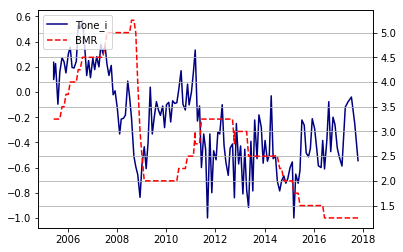

In [301]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
line1 = ax1.plot(df6.tone_i,color ='navy',label = 'Tone_i',)
line2 = ax2.plot(df6.BMR,color ='red',label = 'BMR',linestyle = '--')
line3= line1+line2
labels = [l.get_label() for l in line3]

plt.legend(line3,labels,loc=2)
plt.grid()
# plt.plot(df6['tone_i'],df6['BMR'])

# df6['tone_i'].plot.line(ylim = )
# df6['BMR'].plot.line(ylim = (0))

In [303]:
df5 = df5.drop(columns = ['BMR1','tone_i1'])

In [305]:
df5.to_csv('최종.csv')